# Simulación Montecarlo
> El método de Montecarlo es un método no determinista o estadístico numérico, usado para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud. El método se llamó así en referencia al Casino de Montecarlo (Mónaco) por ser “la capital del juego de azar”, al ser la ruleta un generador simple de números aleatorios. El nombre y el desarrollo sistemático de los métodos de Montecarlo datan aproximadamente de 1944 y se mejoraron enormemente con el desarrollo de la computadora.

Referencia:
- https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo

___
## 1. Introducción

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/5/54/Monte_carlo_method.svg" width="300px" height="100px" />

- Inventado por Stanislaw Ulam y a John von Neumann. Ulam ha explicado cómo se le ocurrió la idea mientras jugaba un solitario durante una enfermedad en 1946. 
- Advirtió que resulta mucho más simple tener una idea del resultado general del solitario haciendo pruebas múltiples con las cartas y contando las proporciones de los resultados que computar todas las posibilidades de combinación formalmente.
- Se le ocurrió que esta misma observación debía aplicarse a su trabajo de Los Álamos sobre difusión de neutrones, para la cual resulta prácticamente imposible solucionar las ecuaciones íntegro-diferenciales que gobiernan la dispersión, la absorción y la fisión.
- Dado que ya  empezaban a estar disponibles máquinas de computación para efectuar las pruebas numéricas, el método cobró  mucha fuerza.
- El método de Montecarlo proporciona soluciones aproximadas a una gran variedad de problemas matemáticos posibilitando la realización de experimentos con muestreos de números pseudoaleatorios en una computadora. El método es aplicable a cualquier tipo de problema, ya sea estocástico o determinista. 
- El método de Montecarlo tiene un error absoluto de la estimación que decrece como $\frac{1}{\sqrt{N}}$ en virtud del teorema del límite central.

### Ejemplo 1
Todos alguna vez hemos aplicado el método Montecarlo (inconscientemente). Como ejemplo, consideremos el juego de Astucia Naval.

Normalmente, primero se realizan una serie de tiros a puntos aleatorios. Una vez se impacta en un barco, se puede utilizar un algoritmo determinista para identificar la posición del barco y así terminar de derrumbarlo.

### Ejemplo 2
Los programas de diseño asistido por ordenador (CAD) pueden determinar rápidamente el volumen de modelos muy complejos. Estos modelos, en general, no tienen una expresión analítica para determinar su volumen y la única solución es dividir el modelo en un conjunto de pequeños submodelos cuyo volumen pueda determinarse (por ejemplo, dividir el modelo en miles de tetraedros). Sin embargo, esto consume muchos recursos. Por ello utilizan métodos de Montecarlo, más robustos y eficientes.

Como el software sí que conoce la expresión analítica de la geometría del modelo (posición de los nodos, aristas y superficies) puede determinar si un punto está dentro del modelo o está fuera con un coste mucho menor que el de determinar un volumen.

   + En primer lugar el software coloca el modelo dentro de un volumen conocido (por ejemplo, dentro de un cubo de $1 m^3$ de volumen).

   + A continuación, genera un punto aleatorio del interior del volumen conocido, y registra si el punto "ha caído" dentro o fuera del modelo. Esto se repite un gran número de veces (miles o millones), consiguiendo un registro muy grande de cuántos puntos han quedado dentro y cuántos fuera.

   + Como la probabilidad de que caiga dentro es proporcional al volumen del modelo, la proporción de puntos que han caído dentro con respecto al total de puntos generados es la misma proporción de volumen que ocupa el modelo dentro del cubo de $1 m^3$.

Si el $50\%$ de los puntos han caído dentro, el modelo ocupa el $50\%$ el volumen total, es decir, $0.5  m^3$. Evidentemente, cuantos más puntos genere el software, menor será el error de la estimación del volumen. 

___
## 2. Caminata aleatoria
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/da/Random_Walk_example.svg" width="300px" height="100px" />

Una caminata aleatoria (*random walk* en inglés) es una formalización matemática de la trayectoria que resulta al hacer pasos sucesivos aleatorios. Un ejemplo elemental de caminata aleatoria es la caminata aleatoria en la línea de números enteros $\mathbb{Z}$, la cual comienza en $0$ y en cada paso se mueve $+1$ o $-1$ con igual probabilidad.

Otros ejemplos:
- Trayectoria de una molécula al viajar en un fluido (líquido o gas).
- El camino que sigue un animal en su búsqueda de comida.
- El precio fluctuante de una acción.
- La situación de un apostador en un juego de azar.

Todos pueden ser aproximados por caminatas aleatorias, aunque no sean en verdad procesos aleatorios.

**Este también es un ejemplo de caminata aleatoria**

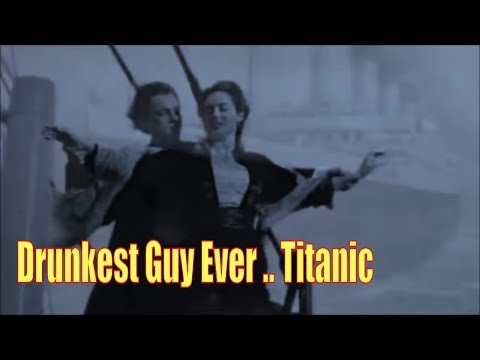

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y77WnkLbT2Q')

### Caminata aleatoria en una dimensión
Como dijimos, un ejemplo elemental de caminata aleatoria es la caminata aleatoria en la línea de números enteros $\mathbb{Z}$, la cual comienza en $0$ y a cada paso se mueve $+1$ o $-1$ con igual probabilidad.

Esta caminata se puede ilustrar como sigue:
- Se posiciona en $0$ en la línea de números enteros y una moneda justa se tira.
- Si cae en **sol** nos moveremos una unidad a la derecha.
- Si cae en **águila** nos moveremos una unidad a la izquierda.

Notemos que después de $5$ pasos podremos estar en 1, −1, 3, −3, 5, o −5. Las posibilidades son las siguientes:

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/05/Flips.svg" width="900px" height="300px" />


Referencia:
- https://en.wikipedia.org/wiki/Random_walk

**Importante:** librería random.

Referencia:
- https://docs.python.org/3/library/random.html

In [1]:
# Importar librería random
import random

In [3]:
random.choice?

In [5]:
# Escribir una función que genere el resultado de una caminata aleatoria de N pasos
def caminata(N):
    x=[0]
    s=[1,-1]
    for i in range(N):
        x.append(x[-1]+random.choice(s))
    return x

**Actividad.** Graficar, en una misma ventana de gráficos, al menos ocho caminatas aleatorias de 100 pasos.

In [2]:
# Importar librería para graficar
import matplotlib.pyplot as plt
%matplotlib inline

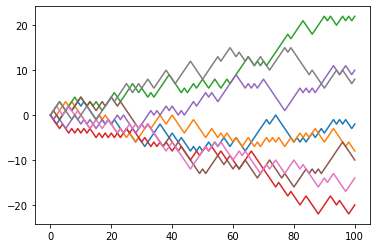

In [6]:
# Solucionar acá
for i in range(8):
    x=caminata(100)
    plt.plot(x)

### Usamos montecarlo para evaluar el resultado de la caminata aleatoria

- Describir, de nuevo, el proceso de la caminata aleatoria en el pizarrón y ver el valor esperado de la caminata después de N pasos.

- Luego, evaluar el proceso utilizando montecarlo y comparar resultados.

In [7]:
import numpy as np
# Número de caminatas
n=10000
# Número de pasos en la caminata
N=100

# Simulación Montecarlo
x=[caminata(N)[-1]]   # inicializamos el arreglo
                      #con el último valor de una caminata
for i in range(n):
    x.append(caminata(N)[-1])
    
print("Promedio del final de trayectoria",np.mean(x))

Promedio del final de trayectoria -0.1523847615238476


## Ejemplo

Ahora, para comprender el alcance de la simulación Montecarlo, tomaremos el ejemplo de un apostador básico.

Referencia:
- https://pythonprogramming.net/monte-carlo-simulator-python/

Supongamos que estamos en un casino especial, donde el usuario puede tirar un *dado metafórico* que puede dar como resultado del número uno (1) al número cien (100).

Si el usuario tira cualquier número entre 1 y 50, el casino gana. Si el usuario tira cualquier número entre 51 y 99, el usuario gana. Si el usuario tira 100, pierde.

Con esto, el casino mantiene un margen del 1%, el cual es mucho más pequeño que el margen típico en casinos, al igual que el margen de mercado cuando se incorporan costos por transacción.

Por ejemplo, [Scottrade](https://www.scottrade.com/) cobra $\$7$ USD por transacción. Si se invierten $\$1000$ USD por acción, esto significa que tienes que pagar $\$7$ USD para entrar, y $\$7$ USD para salir, para un total de $\$14$ USD.

Esto pone el margen en 1.4\%. Esto significa, que a largo plazo, las ganancias tienen que ser mayores a 1.4\% en promedio, de otra manera se estará perdiendo dinero. Aunque este porcentaje es pequeño, las probabilidades ya están en contra. La comercialización de acciones es un juego 50/50, especialmente en el corto plazo.

De nuevo, con nuestro ejemplo en mente, 1-50, la casa gana. 51-99 el usuario gana. Un 100 significa que la casa gana.

Ahora, comencemos. Primero tenemos que crear nuestro dado.

In [8]:
# Explorar función randint de la librería random
help(random.randint)

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [21]:
#crear una función que simule la tirada de un dado
def dado():
    return random.randint(1,100)

In [24]:
for i in range(10):
    print(dado(),end=',')

48,75,91,9,59,42,93,43,67,74,

Sin embargo, el dado por si solo no nos es útil. Necesitamos una función que nos devuelva sólamente si ganamos o perdemos.

In [84]:
 # Crear la función
def juego():
    d=dado()
    if(d<=50):
        return False
    elif(d<=99):
        return True
    else:
        return False
juego(),d

NameError: name 'd' is not defined

In [42]:
# Probar
perdida=0
gane=0
for i in range(100):
    valor=juego()
    if(valor==True):
    #if juego():
        gane = gane+1
    else:
        perdida = perdida+1
gane,perdida

(43, 57)

Ahora, necesitamos crear un apostador. Empezaremos con uno extremadamente básico por ahora. Veremos, que aún con un apostador muy básico, aparecerán cosas muy reveladoras usando un simulador montecarlo.

In [43]:
# Crearemos un apostador simple. Las caracterísitcas son:
# se empieza con un capital inicial, 
# siempre se apuesta lo mismo,
# y se va a apostar un número determinado de veces.
# Si se gana, se añade la apuesta al capital,
# si se pierde, se descuenta la apuesta del capital.
# La función debe devolver un arreglo con el capital al final de cada apuesta.

def apostador(Capini,apuesta,n):
    C=[Capini]
    for i in range(n):
        if juego():
            C.append(C[-1]+apuesta)
        else:
            C.append(C[-1]-apuesta)
    return C

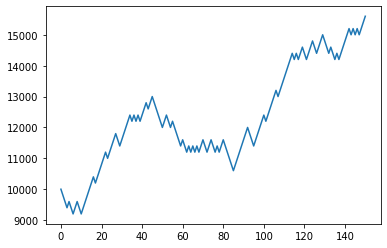

In [44]:
# Ver como evolucionan los fondos de nuestro apostador al jugar 150 veces, con un capital inicial de 10000 pesos
# y con un monto de apuesta de 200 pesos.

C=apostador(10000,200,150)
plt.plot(C)

En realidad no nos importa tanto como evolucionan estos fondos. Nos importa más cuáles son los fondos al final (al largo plazo). Modificar la función anterior para ver esto.

In [45]:
# Función de apostador que devuelve los fondos al final de apostar una cantidad determinadad de veces

def apostador2(Capini,apuesta,n):
    C=Capini
    for i in range(n):
        if juego():
            C += apuesta # C = C + apuesta
        else:
            C -= apuesta # C= C - apuesta
    return C

In [80]:
# (Montecarlo) Simular varios (100) escenarios en que se apuestan 50, 100, 1000 y 10000 veces. ¿Qué pasa?
N=100  # Número de escenarios a simular
n=10000 # Número de apuestas
x=[]

for i in range(N):
    x.append(apostador2(10000,200,n))
np.mean(x)

-27504.0

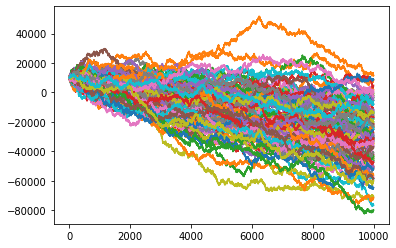

In [81]:
N=100 # Número de escenarios a simular
n=10000 # Número de apuestas

for i in range(N):
    plt.plot(apostador(10000,200,n))

Por esto los apostadores pierden. Normalmente las probabilidades no están evidentemente muy en contra de ellos, solo un poco. Los casinos únicamente entienden psicología básica: ganar es extremadamente adictivo. Por ello, los casino se construyen para mantenerte jugando.

En el corto plazo, la mayoría de los jugadores no se dan cuenta que son más propensos a perder. Las veces que ganan y pierden son muy parejas. Estadísticamente, casi la mitad de las personas terminarán con ganancias después de jugar unas pocas veces. El problema es la adicción, y que ellos continuarán apostando, y por ende perdiendo sus ganancias. Es matemática extremadamente básica, pero la psicología humana es débil.